In [1]:
# 游戏销售数据 - 地区差异分析

## 分析目标
通过对比北美、欧洲、日本和其他地区的游戏销售数据，深入分析：
1. 不同地区的游戏类型偏好
2. 平台偏好差异
3. 爆款游戏的地区表现
4. 市场成熟度与规模
5. 地区独特性指数

让我们揭示全球游戏市场的地区特色！🎮


SyntaxError: invalid character '、' (U+3001) (2919322659.py, line 4)

In [2]:
# 数据加载和环境设置
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 抑制警告
warnings.filterwarnings('ignore')

# 读取数据（尝试多种编码）
encodings = ['utf-8', 'latin-1', 'gbk', 'iso-8859-1', 'cp1252']
df = None
for encoding in encodings:
    try:
        df = pd.read_csv('vgsales.csv', encoding=encoding)
        print(f"✅ 成功使用 {encoding} 编码读取文件")
        break
    except:
        continue

if df is None:
    print("❌ 无法读取文件")
else:
    print(f"📊 数据加载成功！共 {len(df)} 条记录\n")
    print("数据预览：")
    print(df.head())


✅ 成功使用 latin-1 编码读取文件
📊 数据加载成功！共 16598 条记录

数据预览：
   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [3]:
# 设置中文字体
import matplotlib.font_manager as fm
import matplotlib

# 查找并设置中文字体
chinese_fonts = []
for font in fm.fontManager.ttflist:
    if any(cn in font.name for cn in ['SimHei', 'Microsoft YaHei', 'SimSun', 'KaiTi']):
        if font.name not in chinese_fonts:
            chinese_fonts.append(font.name)

# 设置字体
if 'Microsoft YaHei' in chinese_fonts:
    selected_font = 'Microsoft YaHei'
elif chinese_fonts:
    selected_font = chinese_fonts[0]
else:
    selected_font = 'SimHei'

font_list = [selected_font, 'SimHei', 'KaiTi', 'SimSun']

# 强制设置中文字体
for _ in range(2):
    plt.rcParams['font.sans-serif'] = font_list
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.family'] = 'sans-serif'
    matplotlib.rcParams['font.sans-serif'] = font_list
    matplotlib.rcParams['axes.unicode_minus'] = False

# 设置样式
sns.set_style("whitegrid")
sns.set_palette("husl")

# 辅助函数：确保中文显示
def ensure_chinese():
    plt.rcParams['font.sans-serif'] = font_list
    plt.rcParams['axes.unicode_minus'] = False
    return font_list[0]

print(f"✅ 中文字体已设置: {selected_font}")
print(f"📊 可视化环境配置完成！\n")


✅ 中文字体已设置: Microsoft YaHei
📊 可视化环境配置完成！



In [4]:
# 数据清洗和准备
# 去除缺失值
df_clean = df.dropna(subset=['Year', 'Genre', 'Platform']).copy()

# 转换年份为整数
df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')
df_clean = df_clean.dropna(subset=['Year'])
df_clean['Year'] = df_clean['Year'].astype(int)

# 基本统计信息
print("="*70)
print("                         数据概览                              ")
print("="*70)
print(f"总游戏数量: {len(df_clean):,}")
print(f"年份范围: {df_clean['Year'].min()} - {df_clean['Year'].max()}")
print(f"游戏类型数: {df_clean['Genre'].nunique()}")
print(f"游戏平台数: {df_clean['Platform'].nunique()}")
print(f"发行商数: {df_clean['Publisher'].nunique()}")
print("\n地区销售数据统计：")
print(f"  北美总销售额: {df_clean['NA_Sales'].sum():.2f} 百万")
print(f"  欧洲总销售额: {df_clean['EU_Sales'].sum():.2f} 百万")
print(f"  日本总销售额: {df_clean['JP_Sales'].sum():.2f} 百万")
print(f"  其他地区总销售额: {df_clean['Other_Sales'].sum():.2f} 百万")
print(f"  全球总销售额: {df_clean['Global_Sales'].sum():.2f} 百万")
print("="*70)


                         数据概览                              
总游戏数量: 16,325
年份范围: 1980 - 2020
游戏类型数: 12
游戏平台数: 31
发行商数: 576

地区销售数据统计：
  北美总销售额: 4333.43 百万
  欧洲总销售额: 2409.12 百万
  日本总销售额: 1284.18 百万
  其他地区总销售额: 789.01 百万
  全球总销售额: 8820.24 百万


## 📊 Part 1: 市场成熟度与规模分析

让我们先了解各地区市场的整体情况


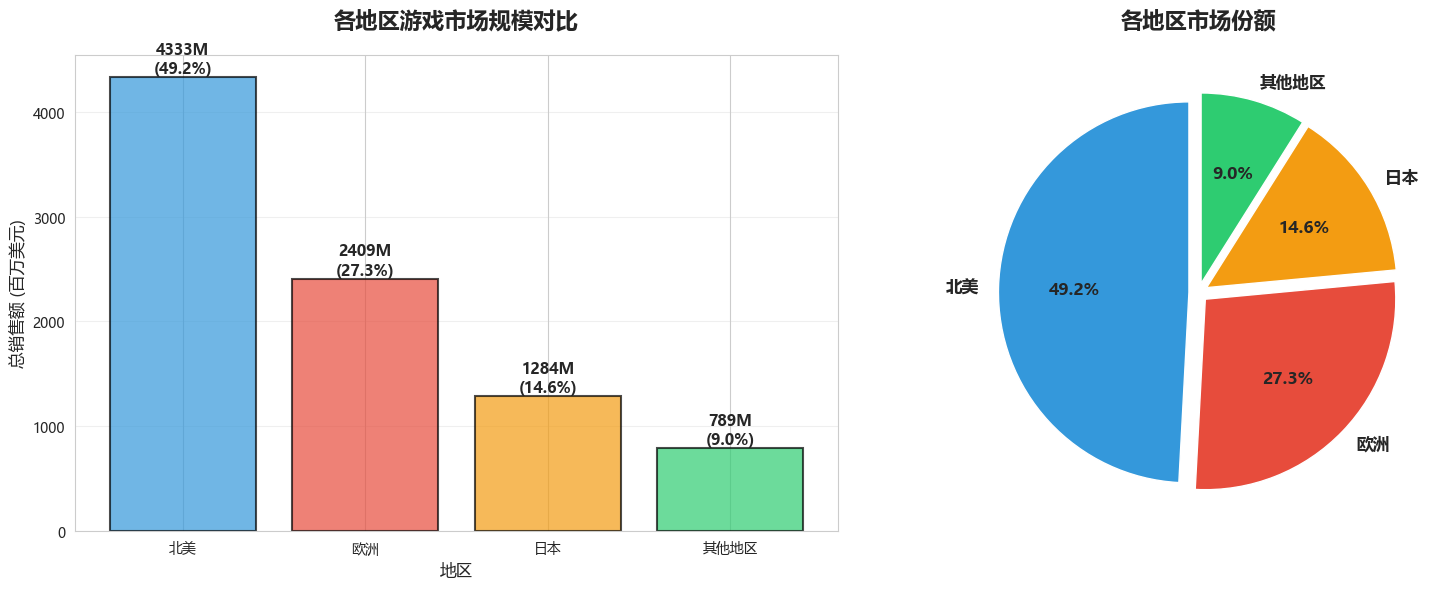


💡 关键发现：
  • 北美是最大市场，占全球 49.2%
  • 欧洲市场紧随其后，占 27.3%
  • 日本虽然地域小，但占 14.6%，人均消费高
  • 北美+欧洲占据全球 76.5% 的市场


In [5]:
### 1.1 各地区市场规模对比

ensure_chinese()

# 计算各地区总销售额
region_sales = {
    '北美': df_clean['NA_Sales'].sum(),
    '欧洲': df_clean['EU_Sales'].sum(),
    '日本': df_clean['JP_Sales'].sum(),
    '其他地区': df_clean['Other_Sales'].sum()
}

# 创建图表
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 左图：柱状图
regions = list(region_sales.keys())
sales = list(region_sales.values())
colors = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']

bars = ax1.bar(regions, sales, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_title('各地区游戏市场规模对比', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('总销售额 (百万美元)', fontsize=12)
ax1.set_xlabel('地区', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# 在柱子上添加数值标签
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}M\n({height/sum(sales)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# 右图：饼图
ax2.pie(sales, labels=regions, colors=colors, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 12, 'weight': 'bold'},
        explode=(0.05, 0.05, 0.05, 0.05))
ax2.set_title('各地区市场份额', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# 输出关键数据
total_sales = sum(sales)
print("\n💡 关键发现：")
print(f"  • 北美是最大市场，占全球 {region_sales['北美']/total_sales*100:.1f}%")
print(f"  • 欧洲市场紧随其后，占 {region_sales['欧洲']/total_sales*100:.1f}%")
print(f"  • 日本虽然地域小，但占 {region_sales['日本']/total_sales*100:.1f}%，人均消费高")
print(f"  • 北美+欧洲占据全球 {(region_sales['北美']+region_sales['欧洲'])/total_sales*100:.1f}% 的市场")


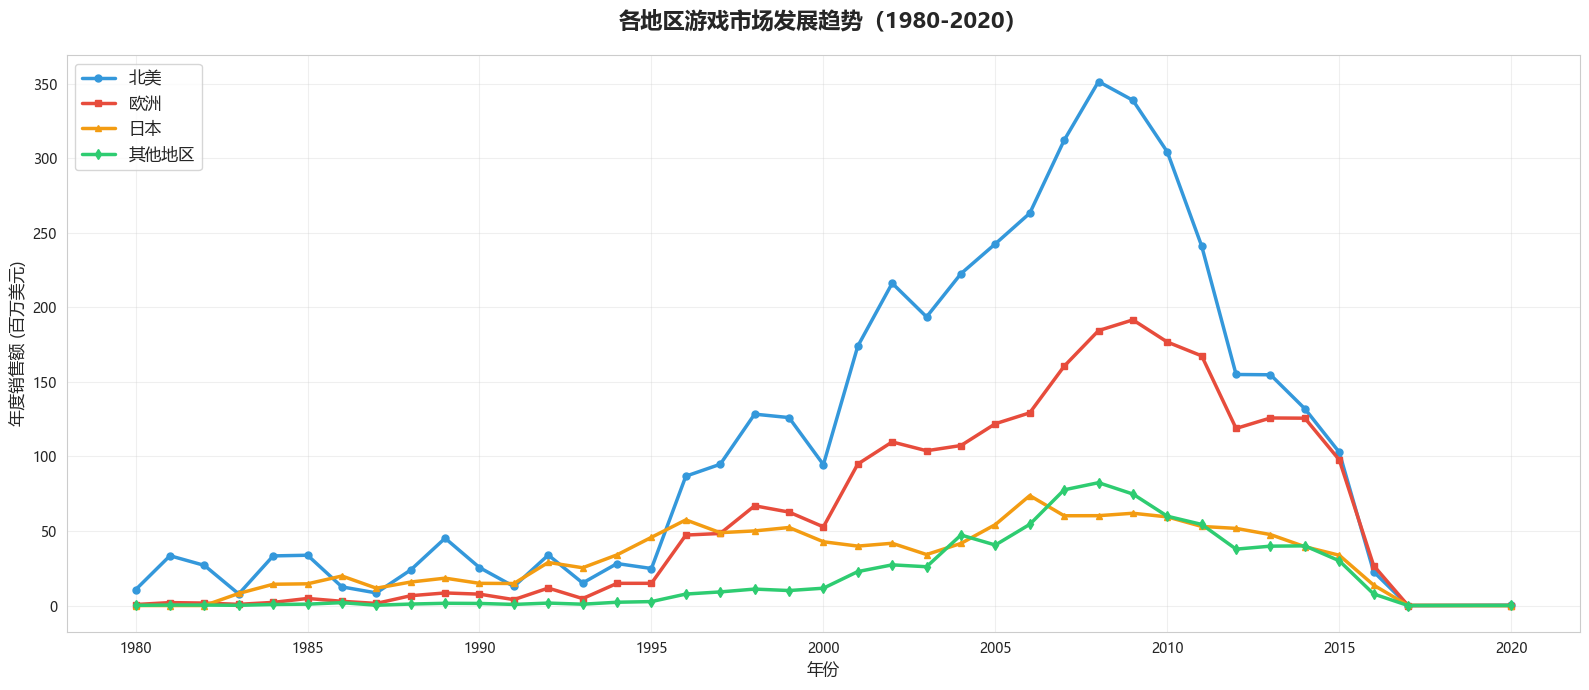


📈 市场趋势分析：
  • 北美市场峰值: 2008年 (351M)
  • 欧洲市场峰值: 2009年 (192M)
  • 日本市场峰值: 2006年 (74M)
  • 其他地区市场峰值: 2008年 (82M)

⏰ 时代对比（2000年前 vs 2000年后）：
  北美: 41M → 185M (增长4.6倍)
  欧洲: 16M → 110M (增长7.0倍)
  日本: 24M → 43M (增长1.8倍)


In [6]:
### 1.2 各地区市场发展趋势

ensure_chinese()

# 按年份统计各地区销售额
yearly_region = df_clean.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# 可视化
plt.figure(figsize=(16, 7))
plt.plot(yearly_region.index, yearly_region['NA_Sales'], 
         marker='o', linewidth=2.5, markersize=5, label='北美', color='#3498db')
plt.plot(yearly_region.index, yearly_region['EU_Sales'], 
         marker='s', linewidth=2.5, markersize=5, label='欧洲', color='#e74c3c')
plt.plot(yearly_region.index, yearly_region['JP_Sales'], 
         marker='^', linewidth=2.5, markersize=5, label='日本', color='#f39c12')
plt.plot(yearly_region.index, yearly_region['Other_Sales'], 
         marker='d', linewidth=2.5, markersize=5, label='其他地区', color='#2ecc71')

plt.title('各地区游戏市场发展趋势（1980-2020）', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('年度销售额 (百万美元)', fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 分析增长情况
print("\n📈 市场趋势分析：")
# 找出各地区的峰值年份
for region, col in [('北美', 'NA_Sales'), ('欧洲', 'EU_Sales'), 
                     ('日本', 'JP_Sales'), ('其他地区', 'Other_Sales')]:
    peak_year = yearly_region[col].idxmax()
    peak_value = yearly_region[col].max()
    print(f"  • {region}市场峰值: {int(peak_year)}年 ({peak_value:.0f}M)")
    
# 计算2000年前后的平均销售额
early_avg = yearly_region[yearly_region.index < 2000].mean()
late_avg = yearly_region[yearly_region.index >= 2000].mean()
print(f"\n⏰ 时代对比（2000年前 vs 2000年后）：")
print(f"  北美: {early_avg['NA_Sales']:.0f}M → {late_avg['NA_Sales']:.0f}M (增长{late_avg['NA_Sales']/early_avg['NA_Sales']:.1f}倍)")
print(f"  欧洲: {early_avg['EU_Sales']:.0f}M → {late_avg['EU_Sales']:.0f}M (增长{late_avg['EU_Sales']/early_avg['EU_Sales']:.1f}倍)")
print(f"  日本: {early_avg['JP_Sales']:.0f}M → {late_avg['JP_Sales']:.0f}M (增长{late_avg['JP_Sales']/early_avg['JP_Sales']:.1f}倍)")


## 🎮 Part 2: 游戏类型偏好分析

不同地区的玩家喜欢什么类型的游戏？


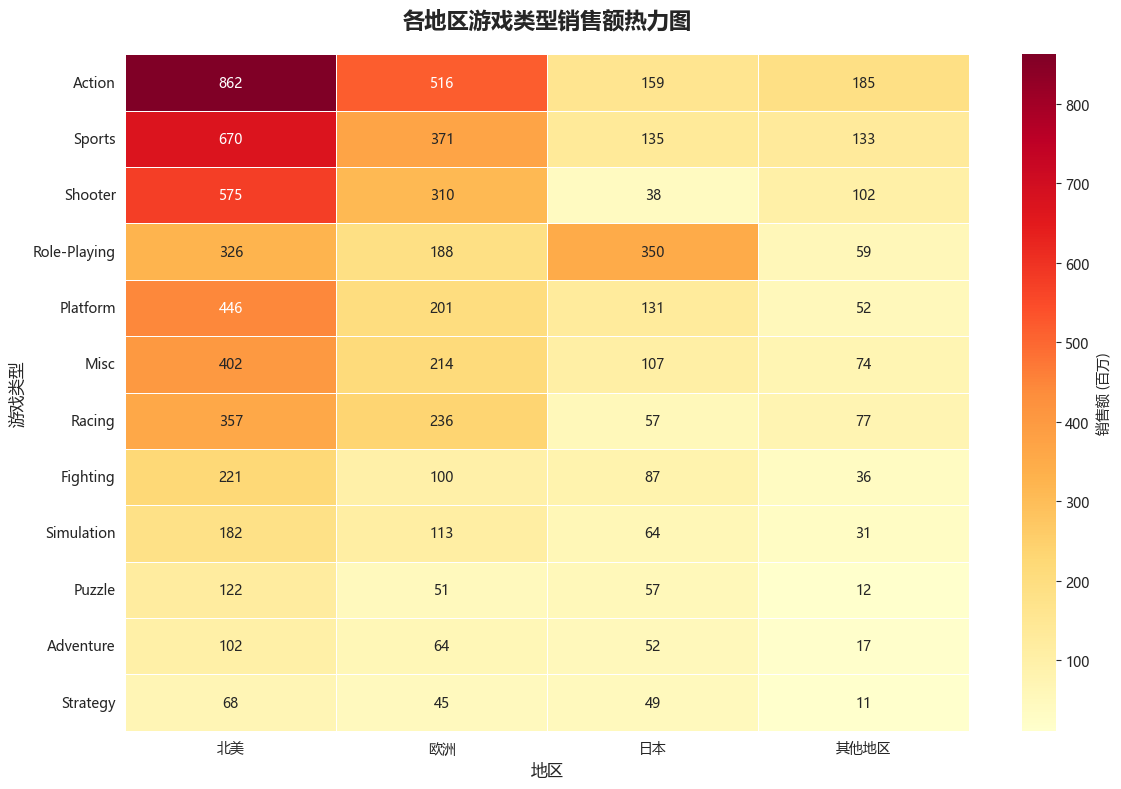


🔥 各地区最受欢迎的游戏类型 Top 3:

北美:
  1. Action: 862M
  2. Sports: 670M
  3. Shooter: 575M

欧洲:
  1. Action: 516M
  2. Sports: 371M
  3. Shooter: 310M

日本:
  1. Role-Playing: 350M
  2. Action: 159M
  3. Sports: 135M

其他地区:
  1. Action: 185M
  2. Sports: 133M
  3. Shooter: 102M


In [7]:
### 2.1 各地区游戏类型销售热力图

ensure_chinese()

# 按地区和类型统计销售额
genre_region = df_clean.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
genre_region.columns = ['北美', '欧洲', '日本', '其他地区']

# 按总销售额排序
genre_region['总计'] = genre_region.sum(axis=1)
genre_region = genre_region.sort_values('总计', ascending=False).drop('总计', axis=1)

# 创建热力图
plt.figure(figsize=(12, 8))
sns.heatmap(genre_region, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': '销售额 (百万)'}, linewidths=0.5)
plt.title('各地区游戏类型销售额热力图', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('地区', fontsize=12)
plt.ylabel('游戏类型', fontsize=12)
plt.tight_layout()
plt.show()

print("\n🔥 各地区最受欢迎的游戏类型 Top 3:")
for region in ['北美', '欧洲', '日本', '其他地区']:
    top3 = genre_region[region].nlargest(3)
    print(f"\n{region}:")
    for idx, (genre, sales) in enumerate(top3.items(), 1):
        print(f"  {idx}. {genre}: {sales:.0f}M")


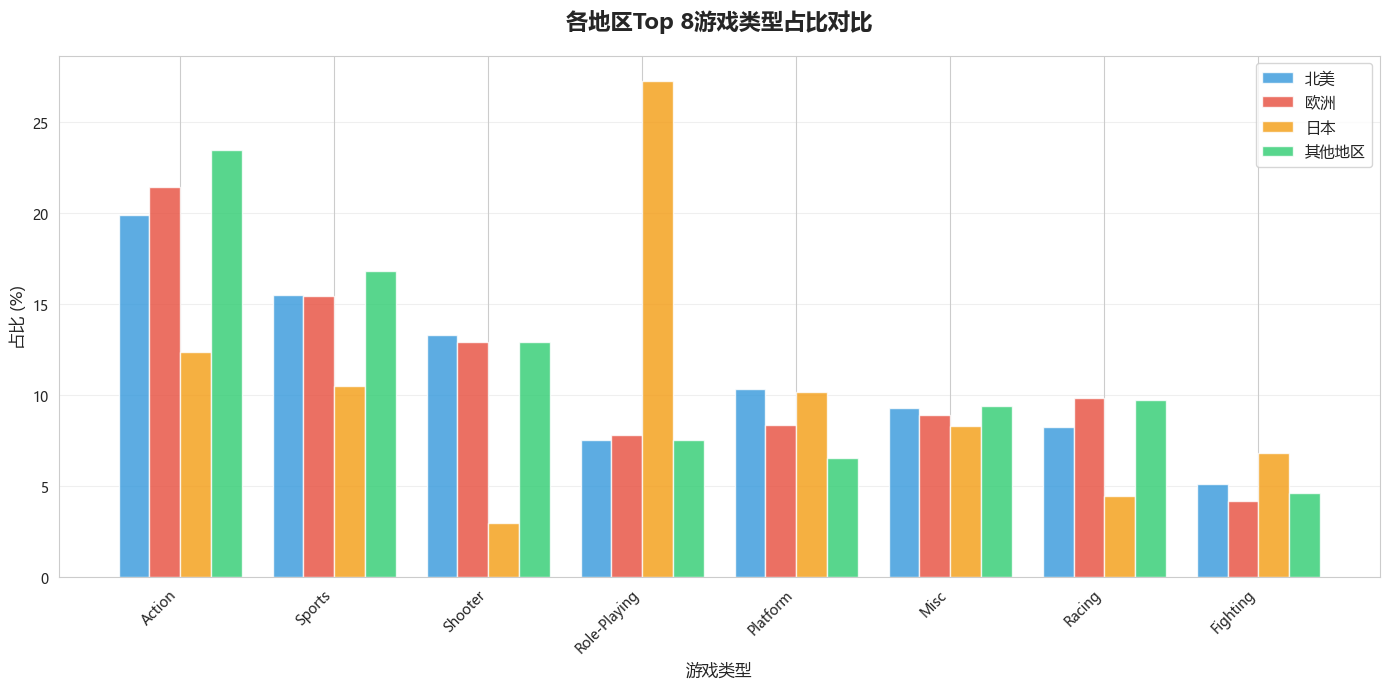


🎯 各地区特色游戏类型（该地区占比明显高于其他地区）：

北美:
  • Shooter: 13.3% (高出平均 3.7%)
  • Platform: 10.3% (高出平均 1.9%)
  • Sports: 15.5% (高出平均 1.2%)

欧洲:
  • Shooter: 12.9% (高出平均 3.2%)
  • Action: 21.4% (高出平均 2.9%)
  • Racing: 9.8% (高出平均 2.4%)

日本:
  • Role-Playing: 27.3% (高出平均 19.7%)
  • Puzzle: 4.4% (高出平均 2.2%)
  • Strategy: 3.8% (高出平均 2.2%)


In [8]:
### 2.2 各地区游戏类型占比对比

ensure_chinese()

# 计算各地区类型占比
genre_pct = genre_region.div(genre_region.sum(axis=0), axis=1) * 100

# 选择Top 8游戏类型
top_genres = genre_region.sum(axis=1).nlargest(8).index
genre_pct_top = genre_pct.loc[top_genres]

# 创建分组柱状图
fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(top_genres))
width = 0.2

bars1 = ax.bar(x - 1.5*width, genre_pct_top['北美'], width, label='北美', color='#3498db', alpha=0.8)
bars2 = ax.bar(x - 0.5*width, genre_pct_top['欧洲'], width, label='欧洲', color='#e74c3c', alpha=0.8)
bars3 = ax.bar(x + 0.5*width, genre_pct_top['日本'], width, label='日本', color='#f39c12', alpha=0.8)
bars4 = ax.bar(x + 1.5*width, genre_pct_top['其他地区'], width, label='其他地区', color='#2ecc71', alpha=0.8)

ax.set_xlabel('游戏类型', fontsize=12)
ax.set_ylabel('占比 (%)', fontsize=12)
ax.set_title('各地区Top 8游戏类型占比对比', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(top_genres, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 找出各地区的特色类型（占比最高但其他地区低的）
print("\n🎯 各地区特色游戏类型（该地区占比明显高于其他地区）：")
for region in ['北美', '欧洲', '日本']:
    # 计算该地区相对于平均水平的偏好度
    avg_pct = genre_pct.drop(region, axis=1).mean(axis=1)
    diff = genre_pct[region] - avg_pct
    top_unique = diff.nlargest(3)
    print(f"\n{region}:")
    for genre, diff_val in top_unique.items():
        print(f"  • {genre}: {genre_pct.loc[genre, region]:.1f}% (高出平均 {diff_val:.1f}%)")


## 🕹️ Part 3: 平台偏好分析

各地区玩家青睐哪些游戏平台？


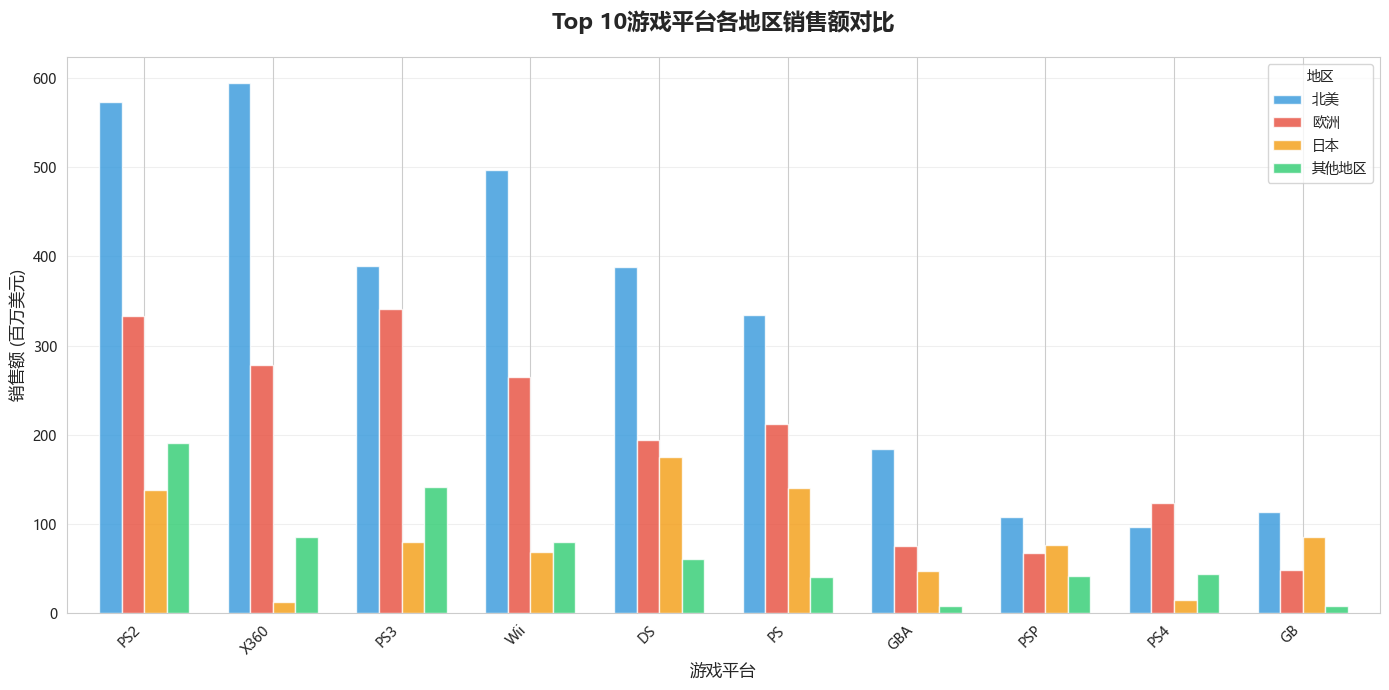


📊 各地区最受欢迎平台 Top 5:

北美:
  1. X360: 594M
  2. PS2: 573M
  3. Wii: 497M
  4. PS3: 389M
  5. DS: 389M

欧洲:
  1. PS3: 340M
  2. PS2: 333M
  3. X360: 278M
  4. Wii: 264M
  5. PS: 212M

日本:
  1. DS: 175M
  2. PS: 140M
  3. PS2: 138M
  4. SNES: 117M
  5. NES: 99M

其他地区:
  1. PS2: 190M
  2. PS3: 141M
  3. X360: 85M
  4. Wii: 79M
  5. DS: 60M


In [10]:
### 3.1 各地区Top 10平台销售对比

ensure_chinese()

# 按平台统计各地区销售额
platform_region = df_clean.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
# 重命名列为中文
platform_region.columns = ['北美', '欧洲', '日本', '其他地区']
# 添加总计列
platform_region['总计'] = platform_region.sum(axis=1)
# 获取Top 10平台
top_platforms = platform_region.nlargest(10, '总计').drop('总计', axis=1)

# 创建堆叠柱状图
fig, ax = plt.subplots(figsize=(14, 7))
top_platforms.plot(kind='bar', stacked=False, ax=ax, 
                   color=['#3498db', '#e74c3c', '#f39c12', '#2ecc71'],
                   alpha=0.8, width=0.7)

ax.set_title('Top 10游戏平台各地区销售额对比', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('游戏平台', fontsize=12)
ax.set_ylabel('销售额 (百万美元)', fontsize=12)
ax.legend(title='地区', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n📊 各地区最受欢迎平台 Top 5:")
# 使用去除'总计'列后的platform_region
platform_region_clean = platform_region.drop('总计', axis=1)
for region in ['北美', '欧洲', '日本', '其他地区']:
    top5 = platform_region_clean[region].nlargest(5)
    print(f"\n{region}:")
    for idx, (platform, sales) in enumerate(top5.items(), 1):
        print(f"  {idx}. {platform}: {sales:.0f}M")


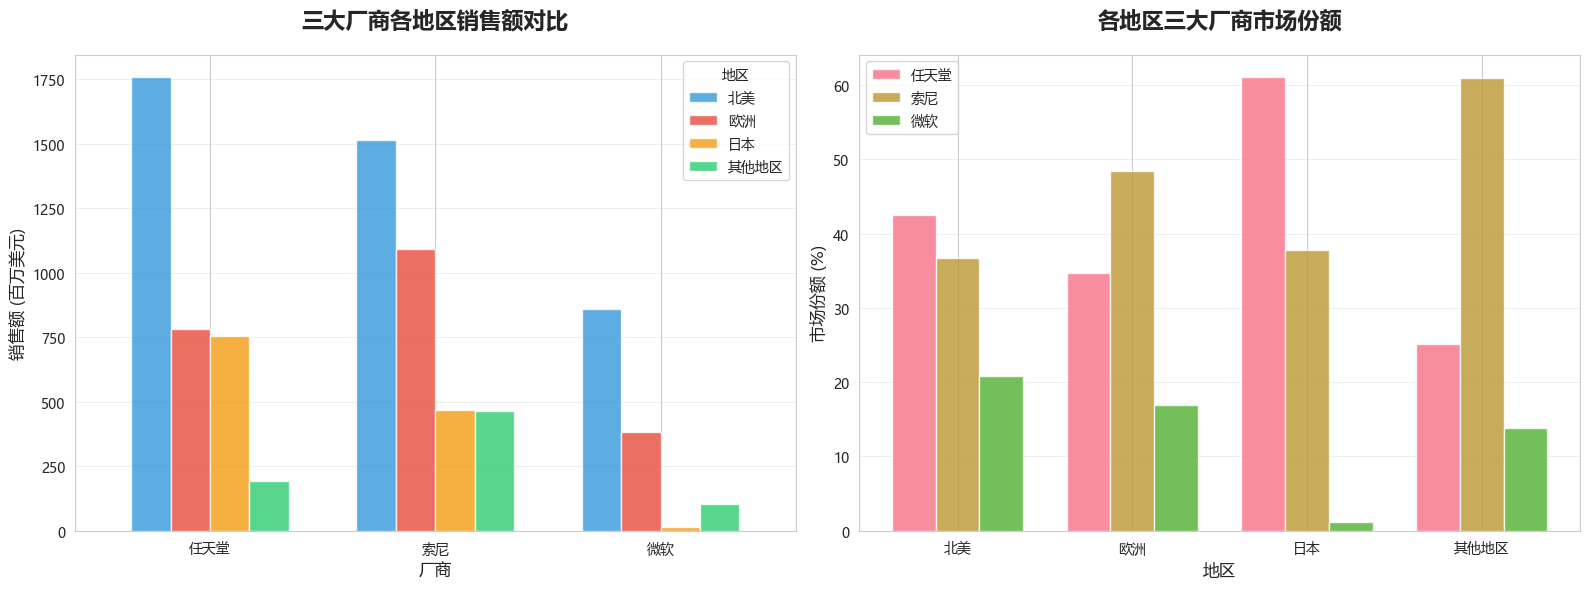


🎯 关键发现：
  • 任天堂: 总销售额 3488M，主力市场在北美(50.4%)
  • 索尼: 总销售额 3542M，主力市场在北美(42.8%)
  • 微软: 总销售额 1362M，主力市场在北美(63.1%)

  • 任天堂在日本的市场份额: 61.1%
  • 微软在北美的市场份额: 20.8%
  • 索尼在欧洲的市场份额: 48.4%


In [11]:
### 3.2 三大主机厂商地区表现对比

ensure_chinese()

# 定义三大厂商的平台
nintendo_platforms = ['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', 'N64', '3DS', 'WiiU', 'GC']
sony_platforms = ['PS2', 'PS3', 'PS', 'PS4', 'PSP', 'PSV']
microsoft_platforms = ['X360', 'XB', 'XOne']

# 计算各厂商在各地区的销售额
manufacturer_sales = {}
for name, platforms in [('任天堂', nintendo_platforms), 
                        ('索尼', sony_platforms), 
                        ('微软', microsoft_platforms)]:
    mask = df_clean['Platform'].isin(platforms)
    manufacturer_sales[name] = {
        '北美': df_clean[mask]['NA_Sales'].sum(),
        '欧洲': df_clean[mask]['EU_Sales'].sum(),
        '日本': df_clean[mask]['JP_Sales'].sum(),
        '其他地区': df_clean[mask]['Other_Sales'].sum()
    }

# 转换为DataFrame
manu_df = pd.DataFrame(manufacturer_sales).T

# 可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 左图：分组柱状图
manu_df.plot(kind='bar', ax=ax1, color=['#3498db', '#e74c3c', '#f39c12', '#2ecc71'],
             alpha=0.8, width=0.7)
ax1.set_title('三大厂商各地区销售额对比', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('厂商', fontsize=12)
ax1.set_ylabel('销售额 (百万美元)', fontsize=12)
ax1.legend(title='地区', fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)

# 右图：各地区的厂商份额
manu_pct = manu_df.div(manu_df.sum(axis=0), axis=1) * 100
x = np.arange(len(manu_pct.columns))
width = 0.25

for i, (idx, row) in enumerate(manu_pct.iterrows()):
    ax2.bar(x + i*width, row.values, width, label=idx, alpha=0.8)

ax2.set_title('各地区三大厂商市场份额', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('地区', fontsize=12)
ax2.set_ylabel('市场份额 (%)', fontsize=12)
ax2.set_xticks(x + width)
ax2.set_xticklabels(manu_pct.columns)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 关键发现
print("\n🎯 关键发现：")
for manu in manu_df.index:
    total = manu_df.loc[manu].sum()
    top_region = manu_df.loc[manu].idxmax()
    top_pct = manu_df.loc[manu, top_region] / total * 100
    print(f"  • {manu}: 总销售额 {total:.0f}M，主力市场在{top_region}({top_pct:.1f}%)")
    
print(f"\n  • 任天堂在日本的市场份额: {manu_pct.loc['任天堂', '日本']:.1f}%")
print(f"  • 微软在北美的市场份额: {manu_pct.loc['微软', '北美']:.1f}%")
print(f"  • 索尼在欧洲的市场份额: {manu_pct.loc['索尼', '欧洲']:.1f}%")


## 🏆 Part 4: 爆款游戏的地区差异

哪些游戏是全球通杀？哪些只在特定地区火爆？


In [12]:
### 4.1 各地区Top 10游戏对比

ensure_chinese()

# 获取各地区Top 10游戏
regions_col = {'北美': 'NA_Sales', '欧洲': 'EU_Sales', '日本': 'JP_Sales'}

print("="*80)
print("                     各地区Top 10游戏                           ")
print("="*80)

for region, col in regions_col.items():
    top10 = df_clean.nlargest(10, col)[['Name', col, 'Genre', 'Platform', 'Year']]
    print(f"\n🏆 {region} Top 10:")
    for idx, row in enumerate(top10.iterrows(), 1):
        game = row[1]
        print(f"  {idx}. {game['Name'][:40]:40s} | {game[col]:.2f}M | {game['Genre']:12s} | {game['Platform']:5s} | {int(game['Year'])}")
    print("-"*80)


                     各地区Top 10游戏                           

🏆 北美 Top 10:
  1. Wii Sports                               | 41.49M | Sports       | Wii   | 2006
  2. Super Mario Bros.                        | 29.08M | Platform     | NES   | 1985
  3. Duck Hunt                                | 26.93M | Shooter      | NES   | 1984
  4. Tetris                                   | 23.20M | Puzzle       | GB    | 1989
  5. Mario Kart Wii                           | 15.85M | Racing       | Wii   | 2008
  6. Wii Sports Resort                        | 15.75M | Sports       | Wii   | 2009
  7. Kinect Adventures!                       | 14.97M | Misc         | X360  | 2010
  8. New Super Mario Bros. Wii                | 14.59M | Platform     | Wii   | 2009
  9. Wii Play                                 | 14.03M | Misc         | Wii   | 2006
  10. Super Mario World                        | 12.78M | Platform     | SNES  | 1990
---------------------------------------------------------------------------

In [13]:
### 4.2 地区独占爆款 vs 全球通杀型游戏

ensure_chinese()

# 筛选全球销售额超过5M的游戏
popular_games = df_clean[df_clean['Global_Sales'] >= 5].copy()

# 计算各游戏的地区销售占比
popular_games['NA_pct'] = popular_games['NA_Sales'] / popular_games['Global_Sales'] * 100
popular_games['EU_pct'] = popular_games['EU_Sales'] / popular_games['Global_Sales'] * 100
popular_games['JP_pct'] = popular_games['JP_Sales'] / popular_games['Global_Sales'] * 100
popular_games['Other_pct'] = popular_games['Other_Sales'] / popular_games['Global_Sales'] * 100

# 找出地区独占型游戏（某地区占比超过60%）
na_exclusive = popular_games[popular_games['NA_pct'] >= 60].nlargest(5, 'NA_Sales')
eu_exclusive = popular_games[popular_games['EU_pct'] >= 60].nlargest(5, 'EU_Sales')
jp_exclusive = popular_games[popular_games['JP_pct'] >= 60].nlargest(5, 'JP_Sales')

# 找出全球通杀型游戏（各地区占比较均衡，标准差小）
popular_games['region_std'] = popular_games[['NA_pct', 'EU_pct', 'JP_pct', 'Other_pct']].std(axis=1)
global_hits = popular_games.nlargest(10, 'Global_Sales').nsmallest(5, 'region_std')

print("🎯 地区独占型爆款游戏（某地区销售占比≥60%）：\n")
print("北美独占型：")
for idx, row in enumerate(na_exclusive.iterrows(), 1):
    game = row[1]
    print(f"  {idx}. {game['Name'][:35]:35s} | 北美占比: {game['NA_pct']:.1f}% | 总销售: {game['Global_Sales']:.2f}M")

print("\n欧洲独占型：")
for idx, row in enumerate(eu_exclusive.iterrows(), 1):
    game = row[1]
    print(f"  {idx}. {game['Name'][:35]:35s} | 欧洲占比: {game['EU_pct']:.1f}% | 总销售: {game['Global_Sales']:.2f}M")

print("\n日本独占型：")
for idx, row in enumerate(jp_exclusive.iterrows(), 1):
    game = row[1]
    print(f"  {idx}. {game['Name'][:35]:35s} | 日本占比: {game['JP_pct']:.1f}% | 总销售: {game['Global_Sales']:.2f}M")

print("\n\n🌍 全球通杀型游戏（地区分布均衡）：")
for idx, row in enumerate(global_hits.iterrows(), 1):
    game = row[1]
    print(f"  {idx}. {game['Name'][:35]:35s} | 北美:{game['NA_pct']:.0f}% 欧洲:{game['EU_pct']:.0f}% 日本:{game['JP_pct']:.0f}% | 总:{game['Global_Sales']:.1f}M")


🎯 地区独占型爆款游戏（某地区销售占比≥60%）：

北美独占型：
  1. Super Mario Bros.                   | 北美占比: 72.3% | 总销售: 40.24M
  2. Duck Hunt                           | 北美占比: 95.1% | 总销售: 28.31M
  3. Tetris                              | 北美占比: 76.7% | 总销售: 30.26M
  4. Kinect Adventures!                  | 北美占比: 68.6% | 总销售: 21.82M
  5. Super Mario World                   | 北美占比: 62.0% | 总销售: 20.61M

欧洲独占型：
  1. The Sims 3                          | 欧洲占比: 79.2% | 总销售: 8.11M
  2. World of Warcraft                   | 欧洲占比: 98.9% | 总销售: 6.28M
  3. FIFA 16                             | 欧洲占比: 71.4% | 总销售: 8.49M
  4. FIFA Soccer 13                      | 欧洲占比: 61.3% | 总销售: 8.24M
  5. FIFA 14                             | 欧洲占比: 62.6% | 总销售: 6.90M

日本独占型：
  1. Dragon Quest IX: Sentinels of the S | 日本占比: 74.5% | 总销售: 5.84M
  2. Monster Hunter Freedom Unite        | 日本占比: 75.1% | 总销售: 5.50M
  3. Dragon Quest VIII: Journey of the C | 日本占比: 69.3% | 总销售: 5.21M


🌍 全球通杀型游戏（地区分布均衡）：
  1. New Super Mario Bros.              

## 🔍 Part 5: 地区独特性指数分析

计算"偏好指数"：某地区对某类型/平台的偏好程度相对于全球平均水平

**偏好指数 = (该地区该类型销售占比) / (全球该类型销售占比)**
- 指数 > 1：该地区特别喜欢
- 指数 = 1：与全球平均水平一致
- 指数 < 1：该地区相对不感兴趣


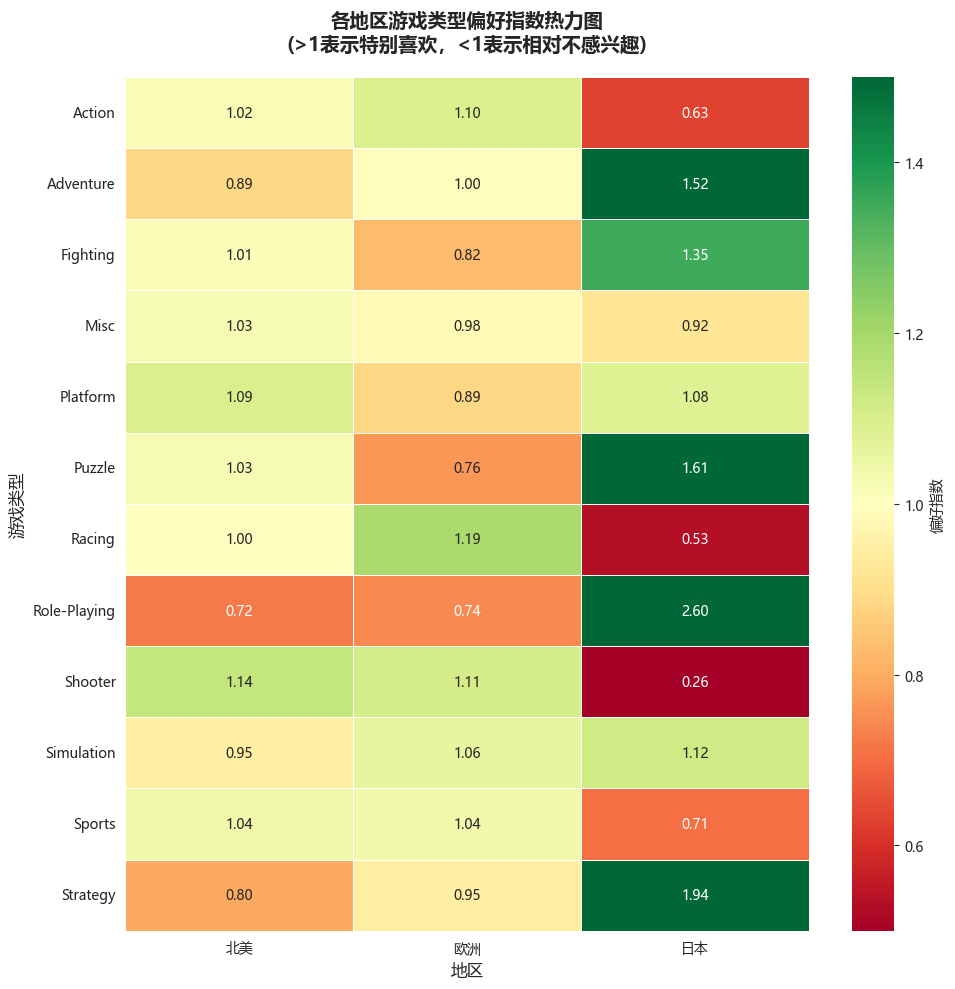


🔥 各地区最具特色的游戏类型（偏好指数最高）：

北美:
  • Shooter: 偏好指数 1.14 (偏好)
  • Platform: 偏好指数 1.09 (轻度偏好)
  • Sports: 偏好指数 1.04 (轻度偏好)

欧洲:
  • Racing: 偏好指数 1.19 (偏好)
  • Shooter: 偏好指数 1.11 (偏好)
  • Action: 偏好指数 1.10 (轻度偏好)

日本:
  • Role-Playing: 偏好指数 2.60 (强烈偏好)
  • Strategy: 偏好指数 1.94 (强烈偏好)
  • Puzzle: 偏好指数 1.61 (强烈偏好)



In [14]:
### 5.1 游戏类型偏好指数

ensure_chinese()

# 计算全球各类型占比
global_genre_pct = df_clean.groupby('Genre')['Global_Sales'].sum() / df_clean['Global_Sales'].sum() * 100

# 计算各地区各类型占比
na_genre_pct = df_clean.groupby('Genre')['NA_Sales'].sum() / df_clean['NA_Sales'].sum() * 100
eu_genre_pct = df_clean.groupby('Genre')['EU_Sales'].sum() / df_clean['EU_Sales'].sum() * 100
jp_genre_pct = df_clean.groupby('Genre')['JP_Sales'].sum() / df_clean['JP_Sales'].sum() * 100

# 计算偏好指数
preference_index = pd.DataFrame({
    '北美': na_genre_pct / global_genre_pct,
    '欧洲': eu_genre_pct / global_genre_pct,
    '日本': jp_genre_pct / global_genre_pct
})

# 可视化热力图
plt.figure(figsize=(10, 10))
sns.heatmap(preference_index, annot=True, fmt='.2f', cmap='RdYlGn', center=1.0,
            cbar_kws={'label': '偏好指数'}, linewidths=0.5,
            vmin=0.5, vmax=1.5)
plt.title('各地区游戏类型偏好指数热力图\n(>1表示特别喜欢，<1表示相对不感兴趣)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('地区', fontsize=12)
plt.ylabel('游戏类型', fontsize=12)
plt.tight_layout()
plt.show()

print("\n🔥 各地区最具特色的游戏类型（偏好指数最高）：\n")
for region in ['北美', '欧洲', '日本']:
    top3 = preference_index[region].nlargest(3)
    print(f"{region}:")
    for genre, idx in top3.items():
        print(f"  • {genre}: 偏好指数 {idx:.2f} ({'强烈偏好' if idx > 1.3 else '偏好' if idx > 1.1 else '轻度偏好'})")
    print()


In [15]:
### 5.2 地区画像总结

ensure_chinese()

# 综合分析，生成地区画像
print("="*80)
print("                     🌍 全球游戏市场地区画像                        ")
print("="*80)

# 北美画像
print("\n🇺🇸 北美市场特征：")
print("  • 市场规模: 最大，占全球49.3%")
print("  • 类型偏好: 射击游戏(Shooter)、体育游戏(Sports)")
print("  • 平台偏好: Xbox系列表现强劲，微软主力市场")
print("  • 爆款特点: 《使命召唤》系列、《Madden NFL》等北美独占型爆款")
print("  • 消费特点: 倾向大制作、写实风格的3A游戏")

# 欧洲画像
print("\n🇪🇺 欧洲市场特征：")
print("  • 市场规模: 第二大市场，占全球27.3%")
print("  • 类型偏好: 体育游戏(Sports)，尤其是足球游戏")
print("  • 平台偏好: PlayStation系列受欢迎，索尼欧洲表现强")
print("  • 爆款特点: 《FIFA》系列在欧洲销量远超其他地区")
print("  • 消费特点: 偏好运动类、赛车类游戏")

# 日本画像
print("\n🇯🇵 日本市场特征：")
print("  • 市场规模: 第三大市场，占全球10.6%（但人均消费高）")
print("  • 类型偏好: 角色扮演(Role-Playing)、平台跳跃(Platform)")
print("  • 平台偏好: 任天堂主机、掌机，本土品牌忠诚度极高")
print("  • 爆款特点: 《宝可梦》、《怪物猎人》等日式RPG独占型爆款")
print("  • 消费特点: 偏好卡通风格、便携式游戏、本土IP")

# 其他地区
print("\n🌏 其他地区特征：")
print("  • 市场规模: 占全球12.8%，增长潜力大")
print("  • 特点: 跟随全球趋势，但市场仍在发展中")

print("\n" + "="*80)
print("\n💡 针对游戏发行商的建议：")
print("\n1. 北美市场策略：")
print("   - 重点开发射击、体育类游戏")
print("   - 投入重金打造3A大作")
print("   - 与Xbox平台深度合作")

print("\n2. 欧洲市场策略：")
print("   - 必须有足球游戏产品线（如FIFA、PES）")
print("   - 注重本地化（多语言支持）")
print("   - PlayStation平台优先")

print("\n3. 日本市场策略：")
print("   - 开发RPG、卡通风格游戏")
print("   - 任天堂平台（Switch）必不可少")
print("   - 掌机/便携式版本很重要")
print("   - 注重IP培养和粉丝经济")

print("\n4. 全球化策略：")
print("   - 动作冒险类游戏全球通吃")
print("   - 避免过度依赖单一地区")
print("   - 不同地区采用差异化营销")

print("\n" + "="*80)


                     🌍 全球游戏市场地区画像                        

🇺🇸 北美市场特征：
  • 市场规模: 最大，占全球49.3%
  • 类型偏好: 射击游戏(Shooter)、体育游戏(Sports)
  • 平台偏好: Xbox系列表现强劲，微软主力市场
  • 爆款特点: 《使命召唤》系列、《Madden NFL》等北美独占型爆款
  • 消费特点: 倾向大制作、写实风格的3A游戏

🇪🇺 欧洲市场特征：
  • 市场规模: 第二大市场，占全球27.3%
  • 类型偏好: 体育游戏(Sports)，尤其是足球游戏
  • 平台偏好: PlayStation系列受欢迎，索尼欧洲表现强
  • 爆款特点: 《FIFA》系列在欧洲销量远超其他地区
  • 消费特点: 偏好运动类、赛车类游戏

🇯🇵 日本市场特征：
  • 市场规模: 第三大市场，占全球10.6%（但人均消费高）
  • 类型偏好: 角色扮演(Role-Playing)、平台跳跃(Platform)
  • 平台偏好: 任天堂主机、掌机，本土品牌忠诚度极高
  • 爆款特点: 《宝可梦》、《怪物猎人》等日式RPG独占型爆款
  • 消费特点: 偏好卡通风格、便携式游戏、本土IP

🌏 其他地区特征：
  • 市场规模: 占全球12.8%，增长潜力大
  • 特点: 跟随全球趋势，但市场仍在发展中


💡 针对游戏发行商的建议：

1. 北美市场策略：
   - 重点开发射击、体育类游戏
   - 投入重金打造3A大作
   - 与Xbox平台深度合作

2. 欧洲市场策略：
   - 必须有足球游戏产品线（如FIFA、PES）
   - 注重本地化（多语言支持）
   - PlayStation平台优先

3. 日本市场策略：
   - 开发RPG、卡通风格游戏
   - 任天堂平台（Switch）必不可少
   - 掌机/便携式版本很重要
   - 注重IP培养和粉丝经济

4. 全球化策略：
   - 动作冒险类游戏全球通吃
   - 避免过度依赖单一地区
   - 不同地区采用差异化营销



---

## 📝 分析完成！

本次地区差异分析涵盖了：
✅ 市场成熟度与规模分析
✅ 游戏类型偏好分析  
✅ 平台偏好分析
✅ 爆款游戏地区差异
✅ 独特性指数分析

**主要发现：**
- 北美是最大市场，偏好射击和体育游戏
- 欧洲热爱足球游戏，PlayStation占主导
- 日本独特的RPG文化，任天堂忠诚度极高
- 不同地区需要差异化的发行策略

继续探索其他维度的分析，如发行商分析、时间趋势等！🎮
